# Testes de hipótese
Este notebook é responsável por realizar testes de hipóteses sobre o dataset, para comparar valores de categorias.

In [1]:
from Utils import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

#Ao executar o teste de Shapiro-Wilk, o Scipy gera um Warning dizendo que este
#teste pode retornar valores não acurados para populaçoes com mais de 5000 elementos.
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', 100)
DATASET = "../datasets/clean_vehicles_2.csv"
df = pd.read_csv(DATASET)

### Proposta
Queremos analisar qual o comportamento de troca de veículos de consumidores de carros japoneses. Carros Japoneses são muito conhecidos por sua durabilidade, logo é expectável que um proprietário passe mais tempo com ele antes de revendê-lo. Vamos tentar verificar se isto é uma verdade, e vamos tentar saber se este padrão de troca de veículos é comum entre usuários das 3 marcas japonesas mais populares nos EUA: Toyota, Nissan e Honda.

Para isso, vamos verificar se a distribuição de ano de fabricação de cada carro revendido é normal. Divideremos os dados nas 3 fabricantes citadas acima

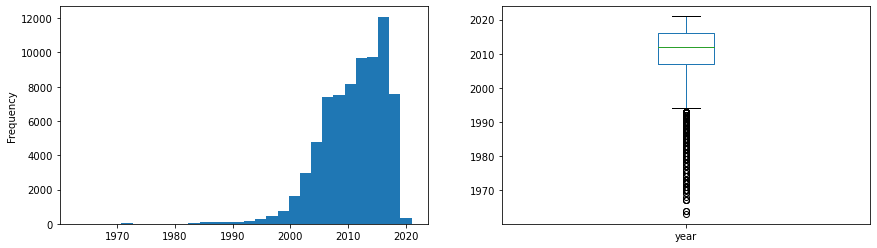

In [3]:
filter_list = ['toyota','nissan','honda']

#Dividindo o dataset entre as 3 fabricantes citadas
toyota = df[df['manufacturer'].isin(['toyota'])][['price', 'year','odometer']]
nissan = df[df['manufacturer'].isin(['nissan'])][['price', 'year','odometer']]
honda = df[df['manufacturer'].isin(['honda'])][['price', 'year','odometer']]

#Plotting do Histograma e Boxplot
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
df[df['manufacturer'].isin(filter_list)]['year'].plot.hist(ax=axs[0], bins = 30)
df[df['manufacturer'].isin(filter_list)]['year'].plot(kind='box',ax=axs[1])

Conseguimos observar que o gráfico não parece uma distribuição normal.
vamos garantir isto executando o teste de normalidade Shapiro-Wilk. Adotando uma significancia de 5%. Ou seja, se P-Valor < 0,05 a hipótese nula é rejeitada.

**Hipótese nula: A população é normalmente distribuída.**


In [4]:
#Executando o teste de Shapiro-Wilk
ststc, pvalue = stats.shapiro(df[df['manufacturer'].isin(filter_list)]['year'])

if(pvalue < 0.05):
    print("Hipótese Nula rejeitada: A população não é normalmente distribuida.")
else:
    print("Hipótese Nula aceita: A população é normalmente distribuida.")


Hipótese Nula rejeitada: A população não é normalmente distribuida.


### Análises individuais por marca
### Toyota

Hipótese Nula rejeitada: A população não é normalmente distribuida.
Para Toyota, os carros mais revendidos são os fabricados em 2017.0. Com 3.0 anos de uso.


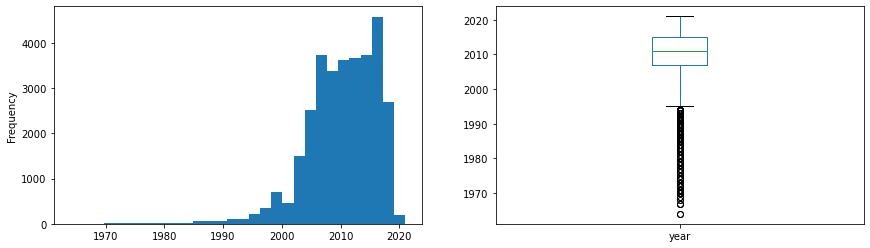

In [5]:
#Plotting do histograma e do Boxplot
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
toyota['year'].plot.hist(ax=axs[0], bins = 30)
toyota['year'].plot(kind='box',ax=axs[1])

#Executando o teste de Shapiro-Wilk
ststc, pvalue = stats.shapiro(toyota['year'])

if(pvalue < 0.05):
    print("Hipótese Nula rejeitada: A população não é normalmente distribuida.")
else:
    print("Hipótese Nula aceita: A população é normalmente distribuida.")

mode = toyota['year'].mode().loc[0]
print("Para Toyota, os carros mais revendidos são os fabricados em " +floatStr(mode)+ ". Com "+str(2020-mode)+" anos de uso.")


### Honda

Hipótese Nula rejeitada: A população não é normalmente distribuida.
Para Honda, os carros mais revendidos são os fabricados em 2012.0. Com 8.0 anos de uso.


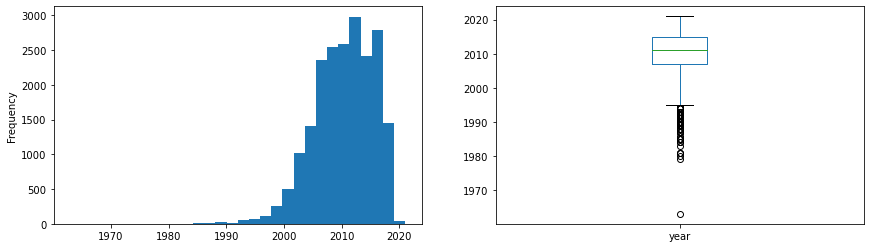

In [6]:
#Plotting do histograma e do Boxplot
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
honda['year'].plot.hist(ax=axs[0], bins = 30)
honda['year'].plot(kind='box',ax=axs[1])

#Executando o teste de Shapiro-Wilk
ststc, pvalue = stats.shapiro(honda['year'])

if(pvalue < 0.05):
    print("Hipótese Nula rejeitada: A população não é normalmente distribuida.")
else:
    print("Hipótese Nula aceita: A população é normalmente distribuida.")
    
    
mode = honda['year'].mode().loc[0]
print("Para Honda, os carros mais revendidos são os fabricados em " +floatStr(mode)+ ". Com "+str(2020-mode)+" anos de uso.")


### Nissan

Hipótese Nula rejeitada: A população não é normalmente distribuida.
Para Nissan, os carros mais revendidos são os fabricados em 2017.0. Com 3.0 anos de uso.


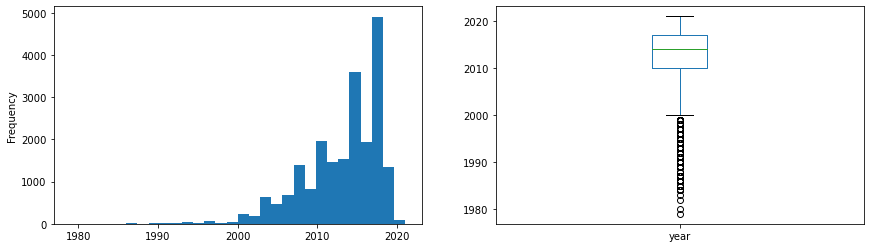

In [7]:
#Plotting do histograma e do Boxplot
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
nissan['year'].plot.hist(ax=axs[0], bins = 30)
nissan['year'].plot(kind='box',ax=axs[1])

#Executando o teste de Shapiro-Wilk
ststc, pvalue = stats.shapiro(nissan['year'])

if(pvalue < 0.05):
    print("Hipótese Nula rejeitada: A população não é normalmente distribuida.")
else:
    print("Hipótese Nula aceita: A população é normalmente distribuida.")
    
mode = nissan['year'].mode().loc[0]
print("Para Nissan, os carros mais revendidos são os fabricados em " +floatStr(mode)+ ". Com "+str(2020-mode)+" anos de uso.")


### Hipótese não pairadas

Queremos perceber se há relação entre a quantidade de anuncios de  Hondas e Toyotas de mesmo ano de fabricação. Como estas grandezas **não são relacionadas (Pairadas)**, usaremos teste de **Mann Whitneyu.** Para esta análise, consideraremos uma significância de 5% (0.05). Ou seja, se P Valor < 0.05, a hipótese nula será rejeitada.

**A Hipótese nula é que as distrubuições são estatisticamente iguais.**

### Honda x Toyota

In [8]:
#Executando o teste de Mann Whitneyu
result, pvalue = stats.mannwhitneyu(honda['year'],toyota['year'])

if(pvalue > 0.05):
    print("Hipótese nula aceita: As populações são estatisticamente iguais")
else:
    print("Hipótese nula rejeitada: As populações não são estatisticamente iguais")

Hipótese nula aceita: As populações são estatisticamente iguais


### Toyota x Nissan

In [9]:
result, pvalue = stats.mannwhitneyu(toyota['year'],nissan['year'])

if(pvalue > 0.05):
    print("Hipótese nula aceita: As populações são estatisticamente iguais")
else:
    print("Hipótese nula rejeitada: As populações não são estatisticamente iguais")

Hipótese nula rejeitada: As populações não são estatisticamente iguais


### Nissan x Honda

In [10]:
#Executando o teste de Mann Whitneyu
result, pvalue = stats.mannwhitneyu(nissan['year'],honda['year'])

if(pvalue > 0.05):
    print("Hipótese nula aceita: As populações são estatisticamente iguais")
else:
    print("Hipótese nula rejeitada: As populações não são estatisticamente iguais")

Hipótese nula rejeitada: As populações não são estatisticamente iguais


### Conclusão

Conseguimos perceber estatísticamente algo que o senso comum já nos diz: Usuários de veículos hondas e toyotas tem um perfil semelhante. Apesar dos carros mais anunciados (Moda) não possuir o mesmo tempo de uso, percebemos que entre estas duas fabricantes, o volume de vendas de carros com até 20 anos de uso ainda é muito alto. Esta característica não está presente no Nissan, apesar de também ser um carro Japonês reconhecido por sua durabilidade. Percebemos que os consumidores de Nissan tem um padrão de consumo (Compra-venda) de seus carros diferente, percebendo-se que a grande maioria dos carros anunciados são mais recentes (com até 10 anos de uso).